In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [88]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img2 = cv2.imread("../DATA/watermark_no_copy.png")

(1401, 934, 3)

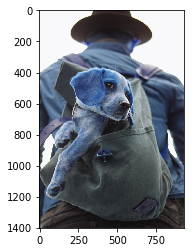

In [89]:
plt.imshow(img1)
img1.shape

(1280, 1277, 3)

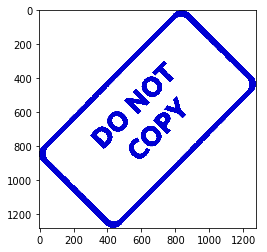

In [90]:
plt.imshow(img2)
img2.shape

In [91]:
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

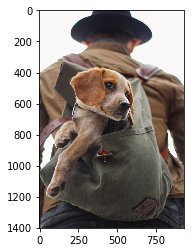

In [92]:
plt.imshow(img1)

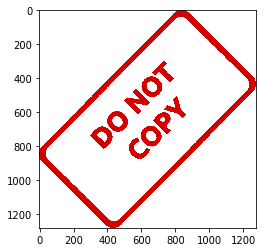

In [93]:
plt.imshow(img2)

In [94]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

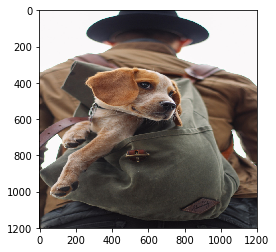

In [95]:
plt.imshow(img1)


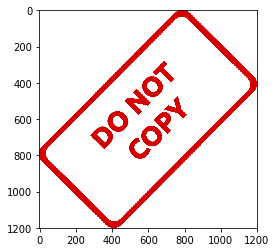

In [96]:
plt.imshow(img2)

# Blending Image

In [97]:
img1.shape

(1200, 1200, 3)

In [98]:
img2.shape

(1200, 1200, 3)

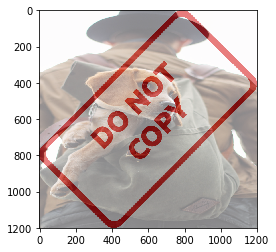

In [99]:
blended = cv2.addWeighted(img1,0.5,img2,0.5,0.9)
plt.imshow(blended)

# Overlaying Images of Different Sizes

In [100]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.resize(img1,(600,600))

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


large_img = img1
small_img = img2

In [101]:
x_offset = 0
y_offset = 0

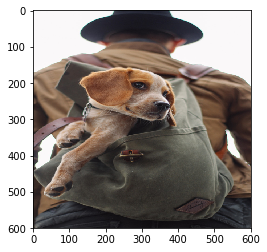

In [102]:
small_img.shape[1]
small_img.shape[0]
plt.imshow(small_img)

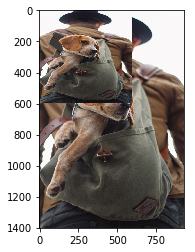

In [103]:
large_img[y_offset : y_offset + small_img.shape[0],x_offset : x_offset + small_img.shape[1]] = small_img
plt.imshow(large_img)

# Blending Images of Different Sizes

In [104]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.resize(img2,(600,600))
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

(1401, 934, 3)

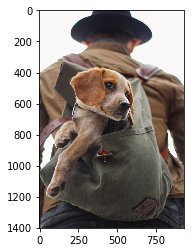

In [105]:
plt.imshow(img1)
img1.shape

(600, 600, 3)

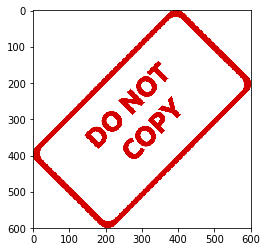

In [106]:
plt.imshow(img2)
img2.shape

# Creating a region of interest

(600, 600, 3)

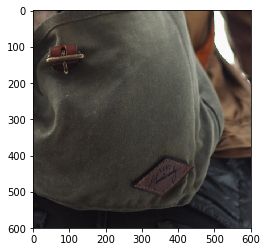

In [107]:
x_offset = 934-600
y_offset = 1401-600
rows,cols,channels = img2.shape
roi = img1[y_offset : 1401,x_offset : 934] 
plt.imshow(roi)
roi.shape

# creating a mask

(600, 600)

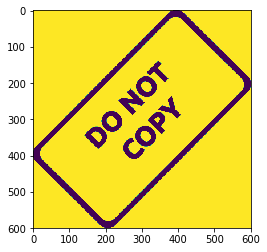

In [108]:
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2_gray)
img2_gray.shape

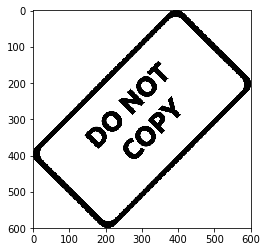

In [109]:
plt.imshow(img2_gray,cmap = 'gray')

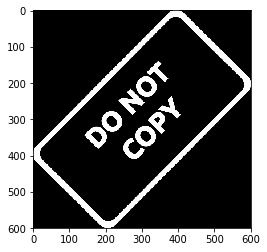

In [110]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv,cmap ='gray')

# Convert mask to have 3 channels

In [111]:
white_background = np.full(img2.shape,255,dtype = np.uint8)

(600, 600, 3)

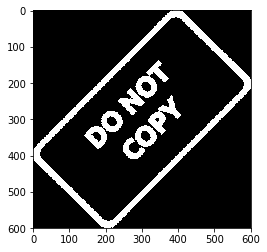

In [112]:
bk = cv2.bitwise_or(white_background,white_background,mask = mask_inv)
plt.imshow(bk)
bk.shape

# grab original fg image and place on the top of mask

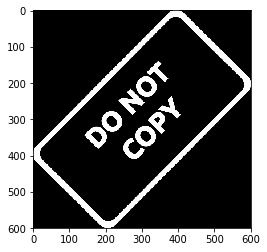

In [113]:
plt.imshow(mask_inv,cmap = 'gray')

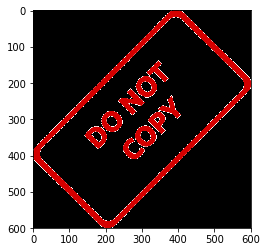

In [114]:
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)
plt.imshow(fg)

# Get ROI and blend in the mask with ROI

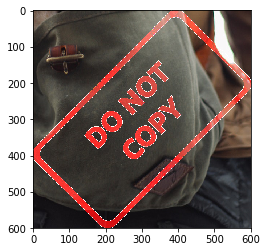

In [115]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

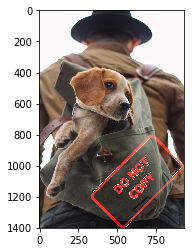

In [116]:
large_img = img1
small_img = final_roi
large_img[y_offset : y_offset + small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)